# Simple Example of a FTGDConvNet on Fashion MNIST

In [31]:
from FTGDConvLayer import *
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.models import *

In [32]:
num_classes = 10
input_shape = (28, 28, 1)


(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()


x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

A little Fully Trainable Gaussian Derivative Convolutional Network. Using one layer with separated linear combination and a classical one.

In [33]:
xIn = Input(shape = input_shape)
x = FTGDConvLayer(filters=16, kernel_size = (7,7), num_basis= 4, order=3, separated = True, name = 'Gaussian1')(xIn)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = FTGDConvLayer(filters=32, kernel_size = (7,7), num_basis= 8, order=3, name = 'Gaussian2')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(num_classes, activation = 'softmax')(x)

model = Model(xIn,x)

In [34]:
model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer  = tensorflow.keras.optimizers.Adam(learning_rate = 0.01), metrics=['accuracy'])

Train it a little bit !

In [35]:
history = model.fit(x_train[:45000, :,:,:], y_train[:45000,:], batch_size = 45, epochs = 2, validation_data=(x_train[45000:, :,:,:], y_train[45000:,:]), verbose = 1)

Epoch 1/2
1000/1000 [==============================] - 120s 72ms/step - loss: 0.7996 - accuracy: 0.7172 - val_loss: 0.6387 - val_accuracy: 0.7751
Epoch 2/2
1000/1000 [==============================] - 66s 66ms/step - loss: 0.5241 - accuracy: 0.8123 - val_loss: 0.5716 - val_accuracy: 0.7789


Let's say your quite happy with the performance and you want to deploy it:

In [36]:
model.layers[1].deploy()
model.layers[4].deploy()
print(model.layers[1].deployed)
print(model.layers[4].deployed)

True
True


You can now use it to test or predict things !

In [37]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Accuracy : %.2f and Test Loss : %.3f' % (score[1]*100, score[0]))

Test Accuracy : 77.21 and Test Loss : 0.598


You want to train it a little bit more:

In [38]:
model.layers[1].to_train()
model.layers[4].to_train()
print(model.layers[1].deployed)
print(model.layers[4].deployed)

False
False


In [39]:
history = model.fit(x_train[:45000, :,:,:], y_train[:45000,:], batch_size = 45, epochs = 1, validation_data=(x_train[45000:, :,:,:], y_train[45000:,:]), verbose = 1)

1000/1000 [==============================] - 67s 67ms/step - loss: 0.4540 - accuracy: 0.8397 - val_loss: 0.5466 - val_accuracy: 0.8034


Look at some of its filters: 

In [40]:
model.layers[1].deploy()
model.layers[4].deploy()

SomeFilters = model.layers[4].GaussFilters
print(SomeFilters.shape)


(7, 7, 16, 32)


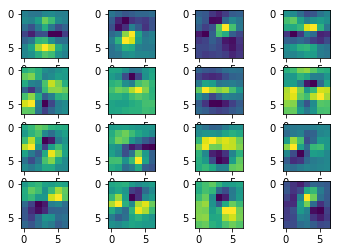

In [42]:
import matplotlib.pyplot as plt

num_filter = 1


plt.figure()
for i in range(SomeFilters.shape[-2]):
    plt.subplot(4, int(SomeFilters.shape[-2]/4), i+1), plt.imshow(SomeFilters[:,:,i,num_filter])
    
plt.show()